# <span style="color:#0073e6">0. 사례준비</span>

> **Libaray & Environment Settings** 

In [1]:
import matplotlib.pyplot as plt

# 가능한 font list 확인
import matplotlib.font_manager as fm
f = [f.name for f in fm.fontManager.ttflist]
print(f)

['DejaVu Serif Display', 'DejaVu Sans', 'STIXGeneral', 'STIXNonUnicode', 'DejaVu Sans', 'cmss10', 'STIXSizeTwoSym', 'STIXGeneral', 'DejaVu Serif', 'STIXNonUnicode', 'DejaVu Serif', 'STIXSizeThreeSym', 'DejaVu Serif', 'DejaVu Sans Mono', 'cmr10', 'DejaVu Sans Mono', 'DejaVu Sans', 'DejaVu Sans', 'cmtt10', 'STIXNonUnicode', 'STIXSizeThreeSym', 'DejaVu Serif', 'STIXGeneral', 'STIXNonUnicode', 'DejaVu Sans Display', 'cmsy10', 'cmb10', 'cmex10', 'DejaVu Sans Mono', 'STIXGeneral', 'STIXSizeOneSym', 'STIXSizeOneSym', 'cmmi10', 'STIXSizeFiveSym', 'STIXSizeFourSym', 'STIXSizeFourSym', 'STIXSizeTwoSym', 'DejaVu Sans Mono', 'DejaVu Sans', 'Ubuntu', 'Ubuntu Mono', 'DejaVu Serif', 'Ubuntu Mono', 'DejaVu Serif', 'Ubuntu', 'Ubuntu Mono', 'Ubuntu Mono', 'DejaVu Sans Mono', 'Ubuntu', 'DejaVu Sans', 'Ubuntu Condensed', 'Ubuntu', 'Ubuntu', 'DejaVu Sans Mono', 'Ubuntu', 'Ubuntu', 'Ubuntu', 'Ubuntu']


In [2]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
#plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
np.random.seed(123)

> **MNIST DATA SET LOADING**

In [3]:
with open('data/mnist.pkl', 'rb') as f:
    _, _, t = pickle.load(f, encoding='latin1')
x, y = t[0], t[1]
del t
print(x.shape)
print(y.shape)

(10000, 784)
(10000,)


> **이미지로 원본 데이터 확인**

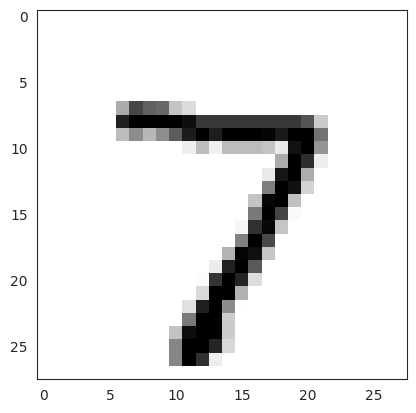

In [4]:
digit = x[0].reshape(28,28)
plt.imshow(digit, cmap=plt.cm.binary);

- - -
# <span style="color:#0073e6">1. PCA<span>

### 1.2. Basic PCA

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=x.shape[1], whiten=False)
pca.fit(x)
x_pca = pca.transform(x)

> **주성분에 의해 설명되는 분산비율**

In [6]:
sum(pca.explained_variance_ratio_)

0.9999999765651182

In [7]:
comp = [10, 20, 50, 100, 200]
for c in comp:
    v = sum(pca.explained_variance_ratio_[:c])
    print('%3d개 주성분 : %.4f' % (c, v))

 10개 주성분 : 0.4971
 20개 주성분 : 0.6533
 50개 주성분 : 0.8316
100개 주성분 : 0.9184
200개 주성분 : 0.9683


- - -
> **결과 시각화**
>> 시각화 함수 정의

In [8]:
def scatter(x, y, p='Paired'):
    gDF = pd.DataFrame(x, columns=['firstVector','secondVector'])
    gDF['Label'] = y
    return sns.scatterplot(x='firstVector',y='secondVector', hue='Label', 
                           palette=sns.color_palette(p, 10), data=gDF);

>> 숫자 분류에 영향을 주는 두 특성으로 산점도 시각화 (PCA 적용전)

In [9]:
RFC = RandomForestClassifier(max_depth=10, n_jobs=-1)
RFC.fit(x, y)
pca_xy = np.where((-RFC.feature_importances_).argsort()<=1)[0]
pca_xy

array([633, 687])

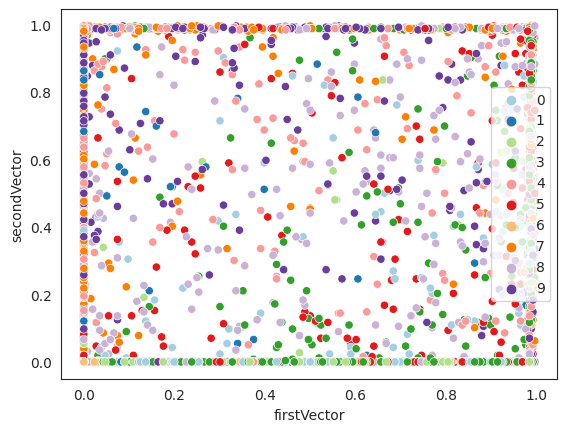

In [10]:
scatter(x[:,pca_xy],y)
plt.legend(loc='right');

>> 숫자 분류에 영향을 주는 두 특성으로 산점도 시각화 (PCA 적용 결과)

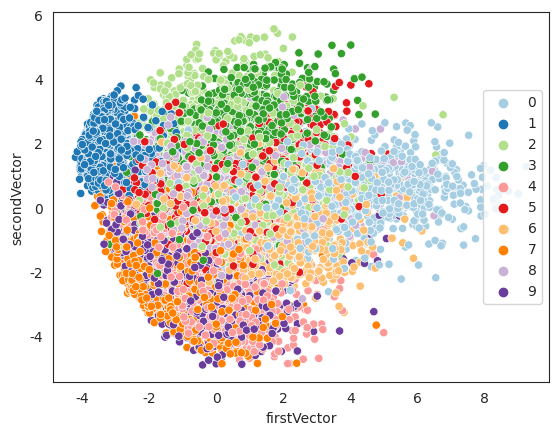

In [11]:
RFC = RandomForestClassifier(max_depth=10, n_jobs=-1)
RFC.fit(x_pca, y)
xy = np.where((-RFC.feature_importances_).argsort()<=1)[0]
scatter(x_pca[:,xy],y)
plt.legend(loc='right');

### 1.3. Incremental PCA (점진적 PCA)

In [12]:
from sklearn.decomposition import IncrementalPCA
iPCA = IncrementalPCA(n_components=x.shape[1], batch_size=None)
x_iPCA = iPCA.fit_transform(x)

> **결과 시각화**
>> 시각화 함수의 수정 : 여러 축에 그릴 수 있도록 축 정보 추가 & 주요 두성분 추출 후 시각화

In [13]:
def scatter01(x, y, axs, p='Paired', loc=0):
    gDF = pd.DataFrame(x, columns=['firstVector','secondVector'])
    gDF['Label'] = y
    return sns.scatterplot(x='firstVector',y='secondVector', hue='Label', 
                           palette=sns.color_palette(p, 10), data=gDF, ax=axs[loc]);
    
def RF_xy(x, y):
    RFC = RandomForestClassifier(max_depth=10, n_jobs=-1)
    RFC.fit(x, y)
    xy = np.where((-RFC.feature_importances_).argsort()<=1)[0]
    return xy

>> 시각화 결과

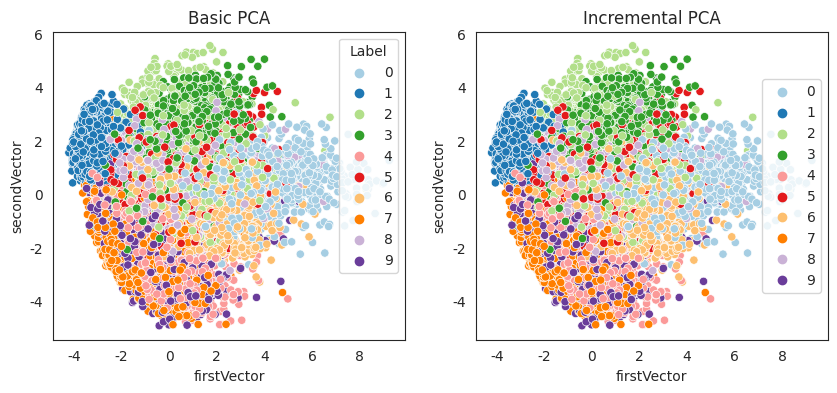

In [14]:
iPCA_xy = RF_xy(x_iPCA, y)

fig, ax = plt.subplots(ncols=2, figsize=(10,4))
scatter01(x_pca[:,xy],y, ax, loc=0)
scatter01(x_iPCA[:,iPCA_xy], y, ax, loc=1)
ax[0].set_title('Basic PCA')
ax[1].set_title('Incremental PCA')
plt.legend(loc='right');

### 1.4. Sparse PCA (희소 PCA)

In [15]:
from sklearn.decomposition import SparsePCA
sPCA = SparsePCA(n_components=x.shape[1], alpha=0.01, n_jobs=-1)
x_sPCA = sPCA.fit_transform(x)

/home/hwi/.local/lib/python3.10/site-packages/sklearn/linear_model/_least_angle.py:678: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 503 iterations, alpha=1.381e-06, previous alpha=1.381e-06, with an active set of 490 regressors.
  warnings.warn(
/home/hwi/.local/lib/python3.10/site-packages/sklearn/linear_model/_least_angle.py:678: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 454 iterations, alpha=2.717e-06, previous alpha=2.716e-06, with an active set of 435 regressors.
  warnings.warn(
/home/hwi/.local/lib/python3.10/site-packages/sklearn/linear_model/_least_angle.py:678: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 522 iterations, alpha=1.570e-06, previous alpha=1.570e-06, with an active set of 515 regressors.


> **결과 시각화**

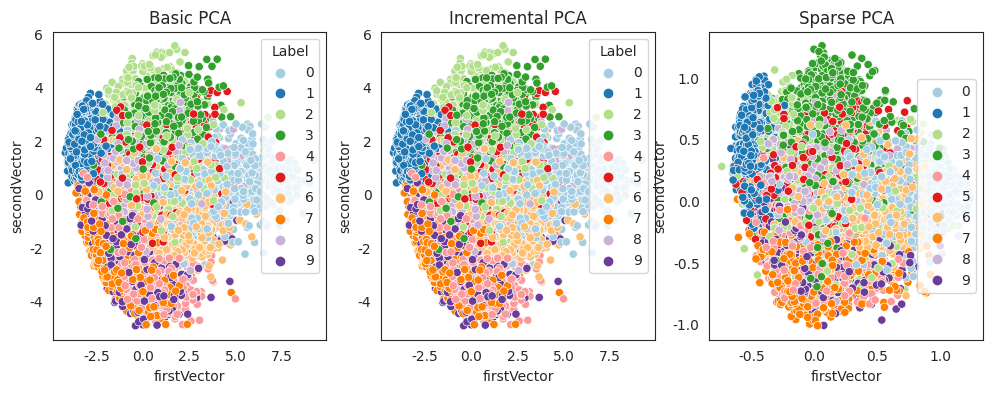

In [16]:
sPCA_xy = RF_xy(x_sPCA, y)

fig, ax = plt.subplots(ncols=3, figsize=(12,4))
scatter01(x_pca[:,xy],y, ax, loc=0)
scatter01(x_iPCA[:,iPCA_xy], y, ax, loc=1)
scatter01(x_sPCA[:,sPCA_xy], y, ax, loc=2)
ax[0].set_title('Basic PCA')
ax[1].set_title('Incremental PCA')
ax[2].set_title('Sparse PCA')
plt.legend(loc='right');

### 1.5. Kernel PCA (커널 PCA)

In [17]:
from sklearn.decomposition import KernelPCA
kPCA = KernelPCA(n_components=None, kernel='rbf', gamma=None, n_jobs=-1)
x_kPCA = kPCA.fit_transform(x)

> **결과 시각화**

In [18]:
def scatter02(x, y, axs, p='Paired', row=0, col=0):
    gDF = pd.DataFrame(x, columns=['firstVector','secondVector'])
    gDF['Label'] = y
    return sns.scatterplot(x='firstVector',y='secondVector', hue='Label', 
                           palette=sns.color_palette(p, 10), data=gDF, ax=axs[row,col]);

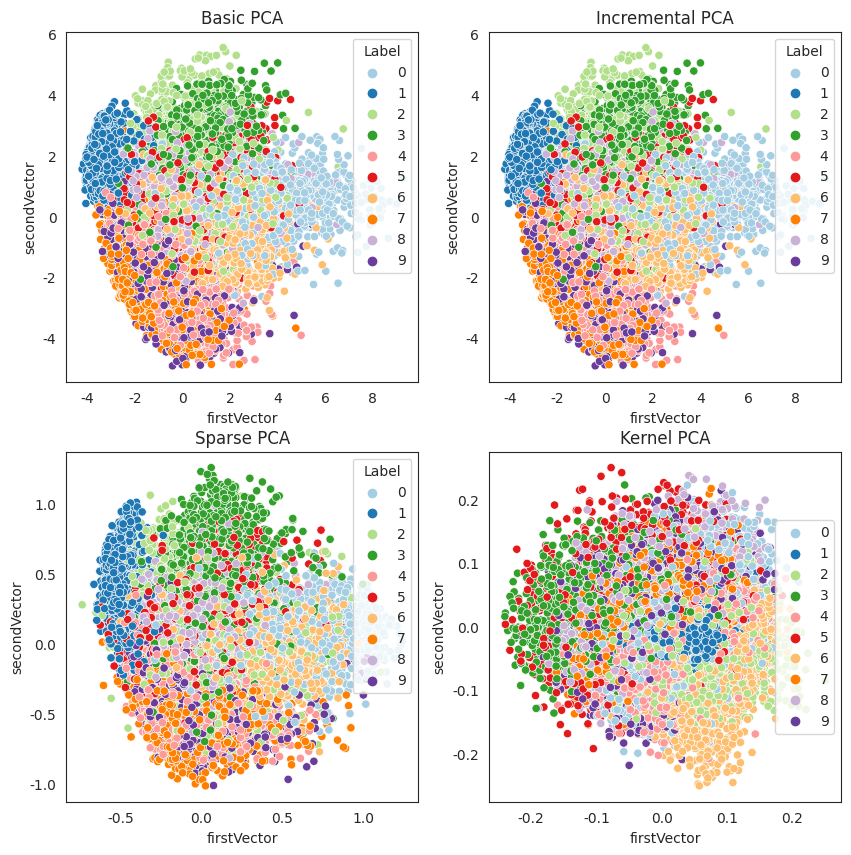

In [19]:
kPCA_xy = RF_xy(x_kPCA, y)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
scatter02(x_pca[:,xy],y, ax, row=0, col=0)
scatter02(x_iPCA[:,iPCA_xy], y, ax, row=0, col=1)
scatter02(x_sPCA[:,sPCA_xy], y, ax, row=1, col=0)
scatter02(x_kPCA[:,kPCA_xy], y, ax, row=1, col=1)
ax[0,0].set_title('Basic PCA')
ax[0,1].set_title('Incremental PCA')
ax[1,0].set_title('Sparse PCA')
ax[1,1].set_title('Kernel PCA')
plt.legend(loc='right');

- - -
# <span style="color:#0073e6">2. SVD</span>

> **SVD(Singular Value Decomposition) : 특이값 분해** 

In [20]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=78)
x_SVD = svd.fit_transform(x)

> **결과 시각화**

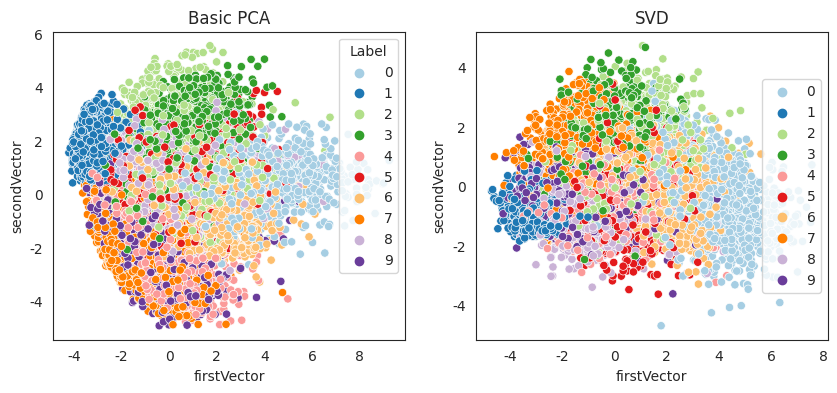

In [21]:
SVD_xy = RF_xy(x_SVD, y)

fig, ax = plt.subplots(ncols=2, figsize=(10,4))
scatter01(x_pca[:,xy],y, ax, loc=0)
scatter01(x_SVD[:,SVD_xy], y, ax, loc=1)
ax[0].set_title('Basic PCA')
ax[1].set_title('SVD')
plt.legend(loc='right');

> **점 사이 거리의 배열이 유지되도록 저차원으로 점을 투영** 

> **GRP**

In [22]:
from sklearn.random_projection import GaussianRandomProjection
GRP = GaussianRandomProjection(n_components='auto', eps=0.5)
x_GRP = GRP.fit_transform(x)

> **SRP**

In [23]:
from sklearn.random_projection import SparseRandomProjection
SRP = SparseRandomProjection(n_components='auto', density='auto', eps=0.5)
x_SRP = SRP.fit_transform(x)

> **결과 시각화**

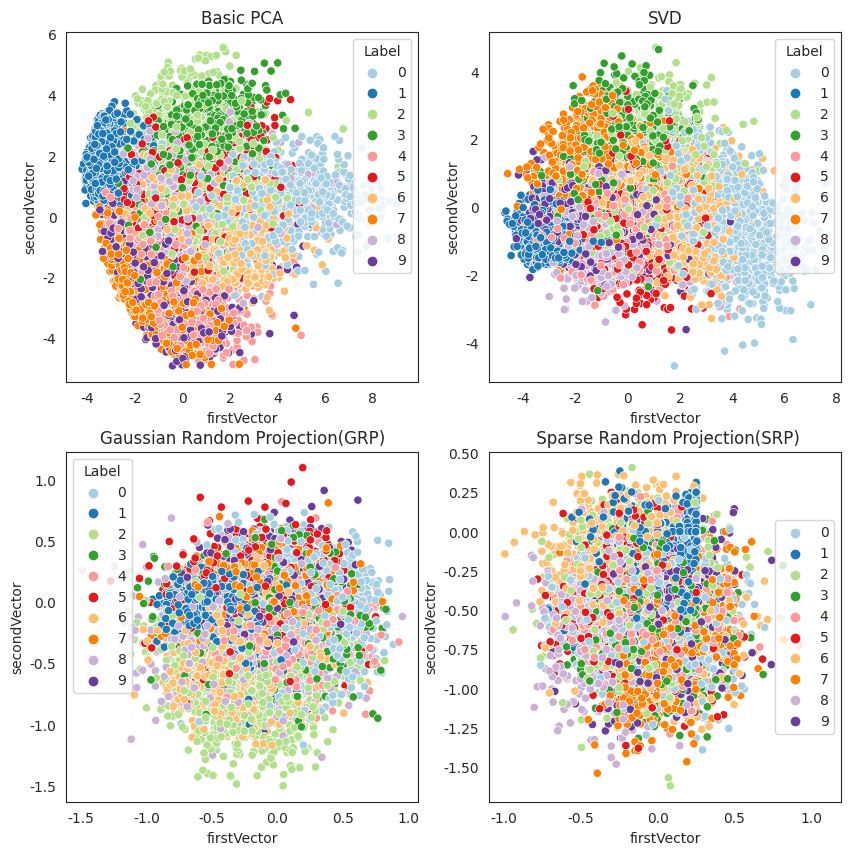

In [24]:
GRP_xy = RF_xy(x_GRP, y)
SRP_xy = RF_xy(x_SRP, y)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
scatter02(x_pca[:,xy],y, ax, row=0, col=0)
scatter02(x_SVD[:,SVD_xy], y, ax, row=0, col=1)
scatter02(x_GRP[:,GRP_xy],y, ax, row=1, col=0)
scatter02(x_SRP[:,SRP_xy], y, ax, row=1, col=1)

ax[0,0].set_title('Basic PCA')
ax[0,1].set_title('SVD')
ax[1,0].set_title('Gaussian Random Projection(GRP)')
ax[1,1].set_title(' Sparse Random Projection(SRP)')
plt.legend(loc='right');

> **Isomap**

In [25]:
from sklearn.manifold import Isomap
isomap = Isomap(n_neighbors=5, n_components=10, n_jobs=-1)
isomap.fit(x)
x_iso = isomap.transform(x)

> **t-SNE**

In [26]:
from sklearn.manifold import TSNE
tSNE = TSNE(n_components=2, learning_rate=300)
x_tSNE = tSNE.fit_transform(x_SVD)

> **ICA(Independent Component Analysis)**

In [27]:
from sklearn.decomposition import FastICA
ICA = FastICA(n_components=25, whiten=True)
x_ICA = ICA.fit_transform(x)

/home/hwi/.local/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)
/home/hwi/.local/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


> **결과 시각화**
>> tSNE시각화

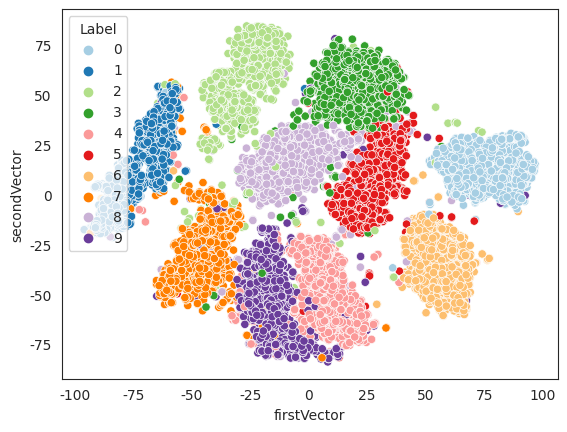

In [28]:
g = pd.DataFrame(x_tSNE, columns=['firstVector','secondVector'])
g['Label'] = y
sns.scatterplot(x='firstVector',y='secondVector', hue='Label',
                palette=sns.color_palette('Paired', 10), data=g);

>> 비선형 차원축소 시각화

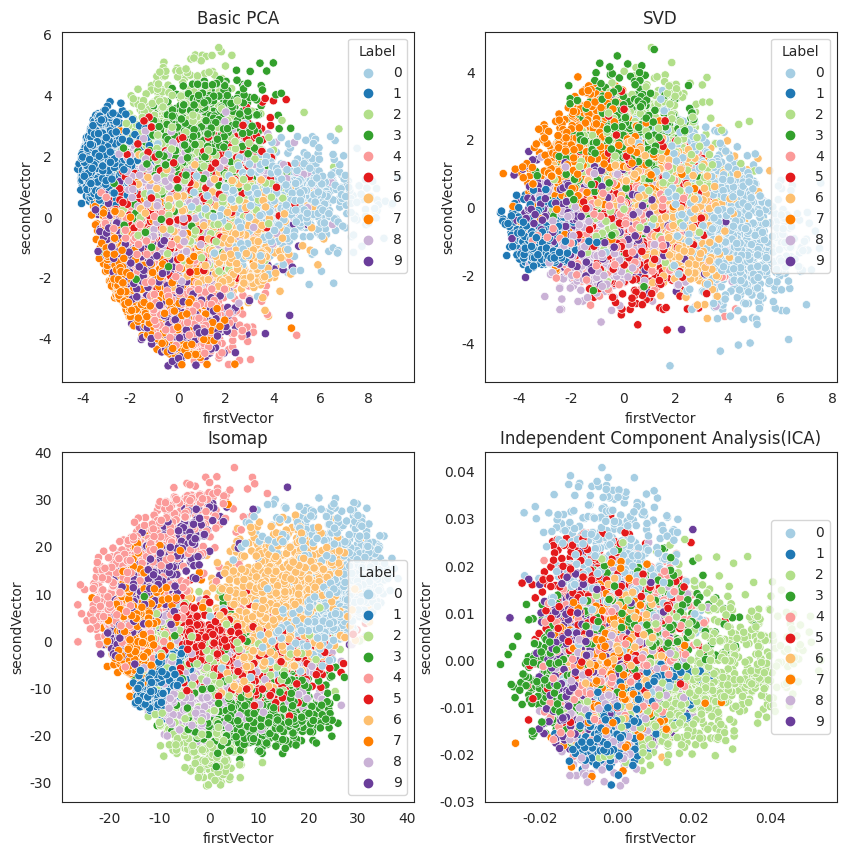

In [29]:
ISO_xy = RF_xy(x_iso, y)
ICA_xy = RF_xy(x_ICA, y)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
scatter02(x_pca[:,xy],y, ax, row=0, col=0)
scatter02(x_SVD[:,SVD_xy], y, ax, row=0, col=1)
scatter02(x_iso[:,ISO_xy],y, ax, row=1, col=0)
scatter02(x_ICA[:,ICA_xy], y, ax, row=1, col=1)

ax[0,0].set_title('Basic PCA')
ax[0,1].set_title('SVD')
ax[1,0].set_title('Isomap')
ax[1,1].set_title('Independent Component Analysis(ICA)')
plt.legend(loc='right');

범주별로 차이나는게 있으면 ica사용

차원축소는 보조적이므로 outlier 보정용으로 사용

t-sne는 시각화용도로만 사용할 것